# Indicadores de bienestar por estado, México 2014

En esta libreta se analizan los estados de la república mexicana a partir de los indicadores de bienestar definidos por la OCDE y que el INEGI ha publicado para el 2014. Los datos se obtuvieron de la [página del INEGI](https://www.inegi.org.mx). Para este problema se tienen 37 indicadores, los cuales se pueden regrupar en 12 macro indicadores establecidos todos por la OCDE para comparar los niveles de bienestar de la población en diferentes paises). Los indicadores se encuentran en los archivos indicadores bienestar 2014.xlsx e indicadores_bienestar_2014.csv cada uno en su formato correspondiente.

Se espera que se realice un análisis de los datos utilizando cualquiera conjunto de herramientas de aprendizaje no supervisado y que se discutan los resultados. Lo más importante en este trabajo es la discusión y el análisis sobre el descubrimiento de relaciones que se obtiene entre estados (y bienestar de los estados) a partir de los datos.

Primero importamos las librerias necesarias y cargamos el archivo de los datos

In [1]:
import numpy as np
import pandas as pd

file_csv = 'indicadores_bienestar_2014.csv'

bienestar_df = pd.read_csv(file_csv, index_col = 0, thousands  = ',')
bienestar_df.columns.names = ['Indicador']

In [2]:
bienestar_df.head()

Indicador,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Entidad,,,,,,,,,,,,,,,,,,,,,
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7


Mostramos un resumen de la infromación obtenida.

In [3]:
bienestar_df.describe()

Indicador,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,85.360606,33.524848,89.027273,7.054545,48.139394,6.009091,31.787879,59.093939,78.618182,75.215152,...,41.430303,6.942424,13.375758,57.137576,3.727273,60.381818,10.027273,62.512121,0.957576,70.972727
std,2.909139,10.908865,8.661310,2.965225,9.092852,2.646946,6.857922,7.052789,3.790486,0.944101,...,14.999010,7.034959,6.055319,13.472917,1.117831,3.344160,4.638782,24.068532,0.111888,16.715043
min,77.200000,9.470000,60.200000,1.700000,30.900000,0.910000,18.300000,33.300000,69.800000,73.000000,...,14.200000,0.600000,4.800000,35.430000,2.000000,52.300000,3.400000,1.500000,0.700000,29.800000
25%,84.500000,25.810000,86.800000,4.100000,41.700000,4.360000,27.900000,56.300000,76.000000,74.900000,...,30.600000,2.600000,9.400000,47.700000,3.000000,58.400000,6.800000,44.900000,0.900000,66.700000
50%,85.600000,33.350000,91.600000,7.000000,46.000000,5.610000,31.100000,60.100000,78.900000,75.500000,...,41.900000,4.400000,12.500000,56.890000,3.700000,60.400000,9.100000,67.500000,1.000000,74.800000
75%,87.200000,41.390000,94.700000,9.300000,55.300000,7.240000,37.200000,63.600000,81.600000,75.900000,...,50.600000,7.900000,16.800000,67.330000,4.400000,61.800000,12.200000,80.500000,1.000000,82.700000
max,90.900000,55.100000,98.500000,13.000000,70.900000,13.960000,45.000000,68.400000,85.000000,76.700000,...,77.100000,28.100000,33.400000,82.020000,7.400000,67.300000,26.200000,100.000000,1.200000,94.900000


## Reducción de la dimensionalidad con PCA

Como en este caso lo que nos interesa es poder hacer una exploración de los datos, vamos a usar el análisis en componentes principales como una herramienta para obtener la mejor foto posible de los datos que nos interesan. Por esta razón, solo vamos a utilizar las dos primeras componentes principales.

Para hacer los componentes principales, no los vamos a programar, si no que vamos a utilizar una biblioteca superpoderosa para aprendizaje máquina `Sklearn`. Si bien estas bibliotecas nos facilitan la vida, hay que tener cuidado de entender la documentación y saber que hace cada algoritmo, si no estaríamos como *el burro que toco la flauta*.

Por ejemplo, para hacer el análisis en componentes principales, simplemente tenemos que hacer:

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(bienestar_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [5]:
bienestar_pca = pca.transform(bienestar_df)

Ahora vamos a transformar el `ndarray` que obtuvimos en un `DataFrame` de *Pandas* para mantener el formato.

In [6]:
bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = bienestar_df.index
bienestar_pca_df.columns = ['CP_1','CP_2']
bienestar_pca_df.head()

,CP_1,CP_2
Entidad,,
Estados Unidos Mexicanos,3072.997525,-327.432327
Aguascalientes,5684.100114,329.205638
Baja California,5867.446393,1354.665166
Baja California Sur,-709.550156,1705.456571
Campeche,-5526.493125,1334.427339


La varianza de los datos que explican los dos primeros componentes principales es:

In [7]:
print(pca.explained_variance_ratio_)

[0.95210537 0.04785766]


Ya estamos listos para imprimir los resultados y vamos a usar las facilidades de graficación que provée Pandas.

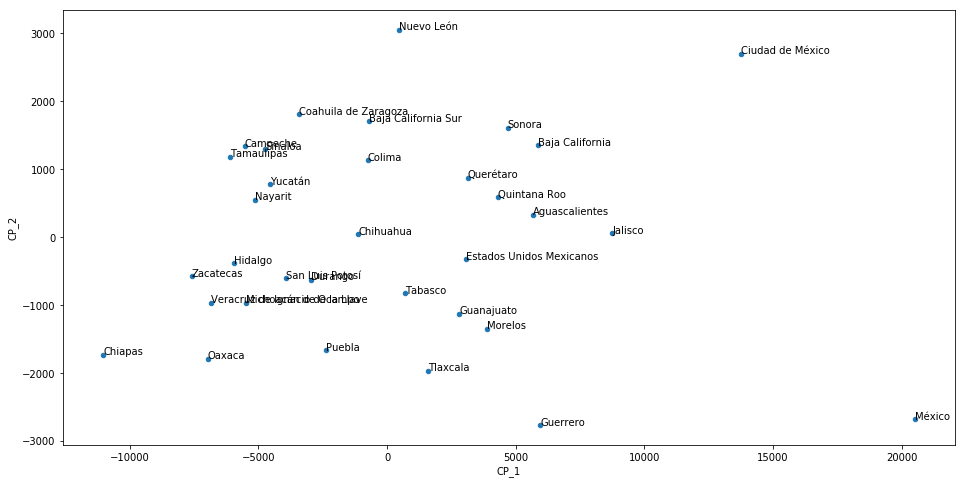

In [8]:
%matplotlib inline

ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, entidad in enumerate(bienestar_pca_df.index):
    ax.annotate(entidad, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de las entidades a lo largo del eje `CP_1` explica mejor las diferencias entre estas mismas.

## Buscando similitudes entre paises usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vaos a utilizar una técnica semi automátixzada llamada *el método del codo*, en la cuál se calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 

Text(0.5, 1.0, 'Selección de K con el método del codo')

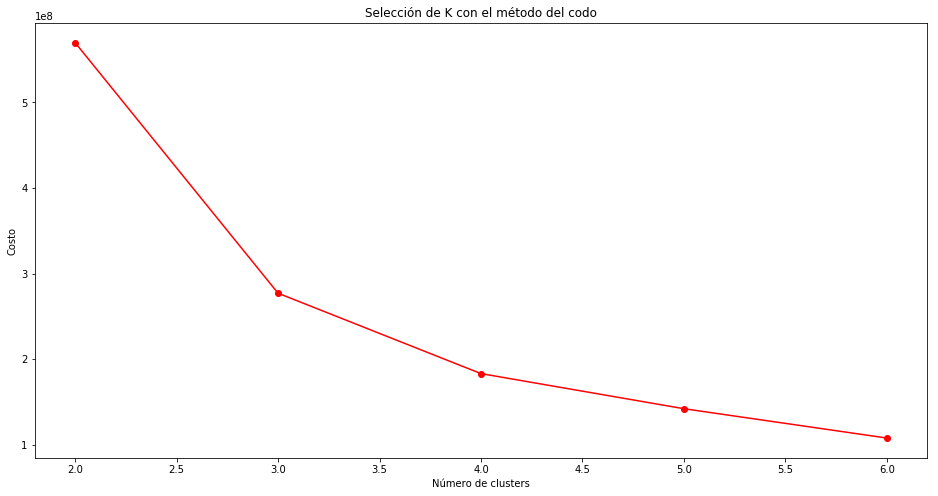

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

En este caso el codo nuemro 3 es el mas pronunciado por lo que nos quedaremos con ese.

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

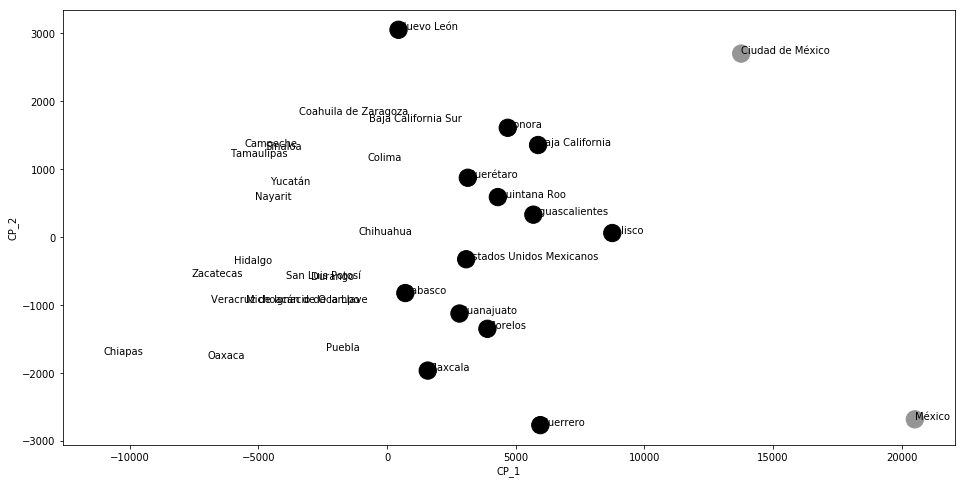

In [33]:
K = 3
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestar_pca_df.index)


ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2',
                     c=bienestar_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, entidad in enumerate(bienestar_pca_df.index):
    ax.annotate(entidad, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de entidades.

In [34]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Protopipo']
prototipos_df.columns.names = ['Año']

prototipos_df

Año,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Protopipo,,,,,,,,,,,,,,,,,,,,,
P1,85.738889,29.743333,87.388889,7.483333,47.950000,7.150000,33.961111,61.777778,78.177778,75.072222,...,44.600000,8.188889,14.677778,59.817222,3.416667,60.438889,8.433333,55.694444,0.944444,67.200000
P2,82.300000,43.185000,95.300000,3.350000,47.350000,1.415000,20.500000,39.650000,72.150000,75.800000,...,37.750000,3.950000,13.650000,52.360000,5.100000,60.300000,15.400000,78.750000,1.100000,86.650000
P3,85.307692,37.274615,90.330769,7.030769,48.523077,5.136154,30.515385,58.369231,80.223077,75.323077,...,37.607692,5.676923,11.530769,54.162308,3.946154,60.315385,11.407692,69.453846,0.953846,73.784615


Graficamos los datos mara una mejor visualización.

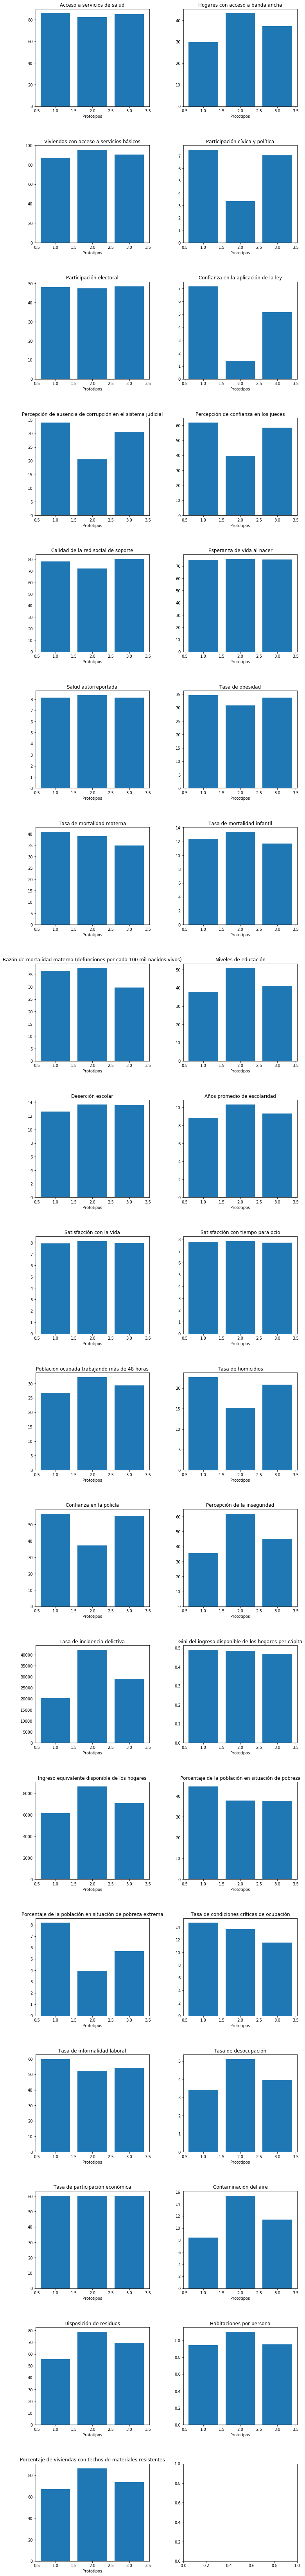

In [36]:
fig, axes = plt.subplots(ncols = 2, nrows = 19, figsize = (12, 120))

ind = [(i, j) for i in range(20) for j in range(2)]

for indicador, (i, j) in zip(prototipos_df, ind):
    axes[i, j].bar([1, 2, 3], prototipos_df[indicador])
    axes[i, j].set(title = indicador)
    axes[i, j].set(xlabel = 'Prototipos')

fig.subplots_adjust(wspace = 0.3, hspace = 0.4)